<a href="https://colab.research.google.com/github/AapeliJ/QPA_2_regression_project/blob/main/Project_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AapeliJ/QPA_2_regression_project/refs/heads/main/Project_merged.csv')

In [ ]:
#2 Display .head(), .info(), and .describe()
df.head()

,name,cntry,trstprl,trstlgl,stfeco,Entity,CPI,PPS
0,ESS11e03,AT,6,9,6,Austria,67.0,-0.233
1,ESS11e03,AT,6,6,2,Austria,67.0,-0.233
2,ESS11e03,AT,7,5,6,Austria,67.0,-0.233
3,ESS11e03,AT,5,6,4,Austria,67.0,-0.233
4,ESS11e03,AT,6,8,6,Austria,67.0,-0.233


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36837 entries, 0 to 36836
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     36837 non-null  object 
 1   cntry    36837 non-null  object 
 2   trstprl  36837 non-null  int64  
 3   trstlgl  36837 non-null  int64  
 4   stfeco   36837 non-null  int64  
 5   Entity   36837 non-null  object 
 6   CPI      36837 non-null  float64
 7   PPS      36837 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,trstprl,trstlgl,stfeco,CPI,PPS
count,36837.000000,36837.000000,36837.000000,36837.000000,36837.000000
mean,5.696609,6.882537,5.751663,60.792546,0.101115
std,10.846218,11.436052,10.725276,12.896062,1.359057
min,0.000000,0.000000,0.000000,41.000000,-2.496000
25%,2.000000,3.000000,3.000000,49.000000,-0.534000
50%,5.000000,6.000000,5.000000,59.000000,-0.083000
75%,6.000000,8.000000,6.000000,69.000000,0.639000
max,99.000000,99.000000,99.000000,88.000000,3.352000


In [ ]:
#3  Comment on data types, missing values, and initial state. Discuss  for data quality and analysis
# Only issue visible, as shown later on, are the potential outliers created by potential errors

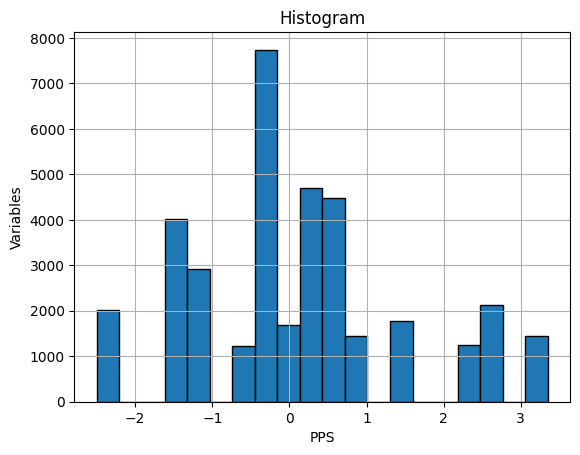

In [ ]:
#4 For your , generate a histogram and box plot.

df["PPS"].hist(bins=20, edgecolor="black")

plt.title("Histogram")
plt.xlabel("PPS")
plt.ylabel("Variables")
plt.show()

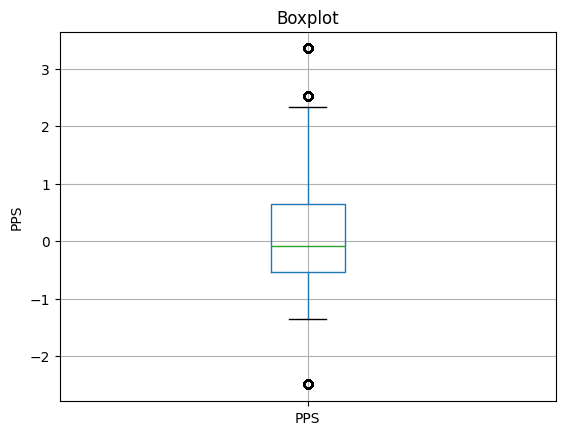

In [ ]:
df.boxplot(column="PPS")
plt.title("Boxplot")
plt.ylabel("PPS")
plt.show()

In [ ]:
#5 ssess continuity, normality, and outliers. Are outliers plausible? How do empirical observations align with
# Homework 2's theoretical checks? Discuss  of its distribution for your model
# Again, outliers seem to be an error in the values. Other values seem to follow normality with slight skews

In [ ]:
df.columns

Index(['name', 'cntry', 'trstprl', 'trstlgl', 'stfeco', 'Entity', 'CPI',
       'PPS'],
      dtype='object')

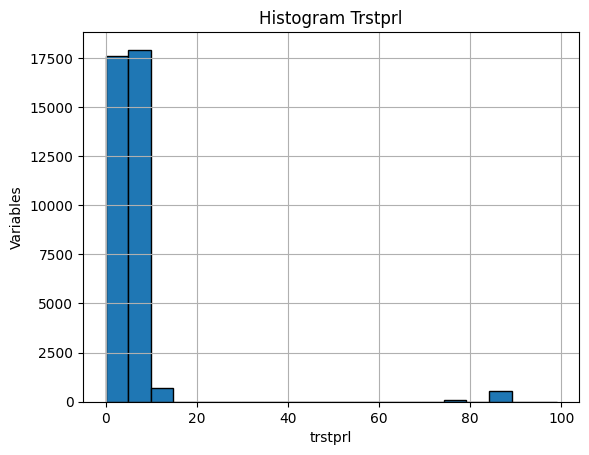

In [ ]:
df["trstprl"].hist(bins=20, edgecolor="black")

plt.title("Histogram Trstprl")
plt.xlabel("trstprl")
plt.ylabel("Variables")
plt.show()

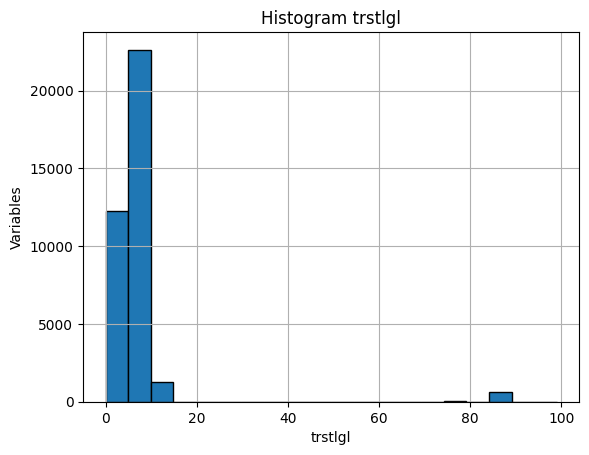

In [ ]:
df["trstlgl"].hist(bins=20, edgecolor="black")

plt.title("Histogram trstlgl")
plt.xlabel("trstlgl")
plt.ylabel("Variables")
plt.show()

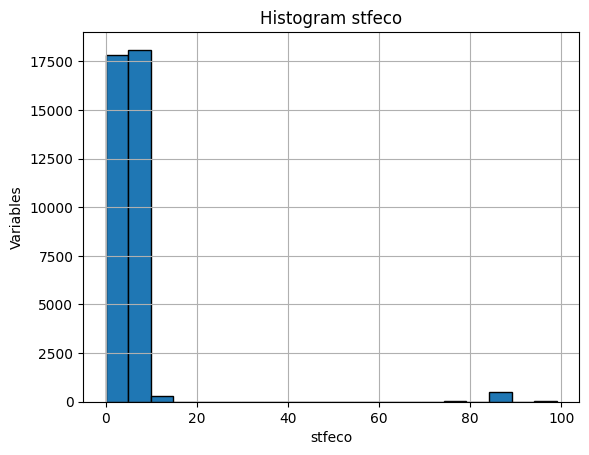

In [ ]:
df["stfeco"].hist(bins=20, edgecolor="black")

plt.title("Histogram stfeco")
plt.xlabel("stfeco")
plt.ylabel("Variables")
plt.show()

In [ ]:
# ESS data seems to have outliers on the 70-90 range, potential errors

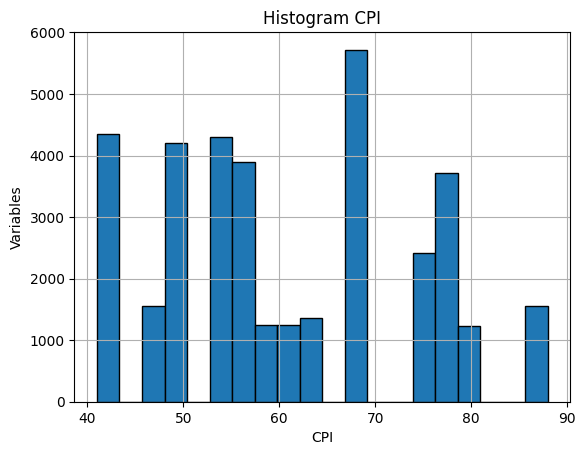

In [ ]:
df["CPI"].hist(bins=20, edgecolor="black")

plt.title("Histogram CPI")
plt.xlabel("CPI")
plt.ylabel("Variables")
plt.show()

In [ ]:
# Assess linearity. Is there empirical evidence of non-linear patterns?
# Compare to Homework 2's theoretical claims. Discuss  for model specification

In [ ]:
independent_vars = ["trstprl", "trstlgl", "stfeco", "CPI"]

In [ ]:
corr_matrix = df[independent_vars].corr()
print(corr_matrix)

          trstprl   trstlgl    stfeco       CPI
trstprl  1.000000  0.363802  0.201279  0.067991
trstlgl  0.363802  1.000000  0.152178  0.042010
stfeco   0.201279  0.152178  1.000000  0.026136
CPI      0.067991  0.042010  0.026136  1.000000


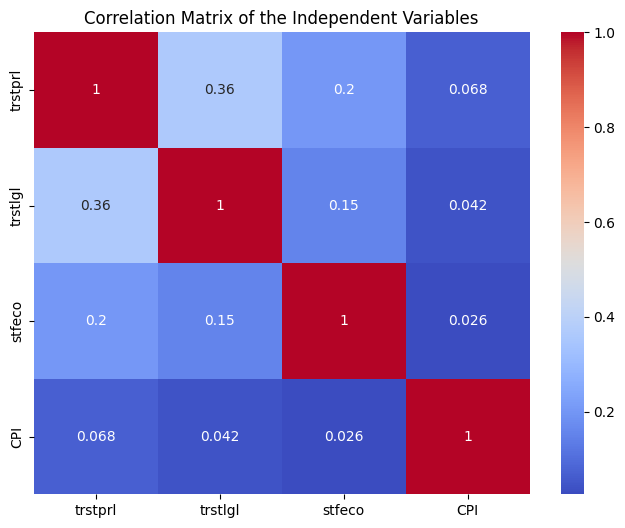

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of the Independent Variables")
plt.show()

In [ ]:
# There does not seem to be highly correlating pairs as was thought to potentially occur during our last meeting
# The correlations precented should not prove problematic when it comes to the progression of the project

In [ ]:
# When it comes to the cleaning and preprocessing plan, both were largely done in the other notebook. Last bit to potentially handle are the
# 88 values (if I remember correctly are missing values, only a handful present) and should not be problematic; I have over 30,000 entries
# in general

In [ ]:
# as stated earlier, regarding the "remove, transform, or investigate identified outliers", I will investigate them at first and then
# mostlikely delete them, I am rather certain that they are simply errors, remove the whole entry from the thing ta-da

In [ ]:
# In general, when talking about the theoretical assumptions, they seem to hold following this work. While the issue of interconnectedness
# might have been thought, the correlation between the independent variables does not seem too problematic
# Therefore, we can include all the variables in the later stages of the project (though i did think about adding another year than 2024
# to add some comparisons between years to further support the later work)

In [ ]:
# Coefficients seem to be linear, so multilinear work should be able to be continued
# the main interest to me here to be honest was the question of the lower correlation with corruption
# however the slight correlation (circa 0.3) between the trusts is not particularily surprising but could show more detailed
# situations in countries (eg. Poland)